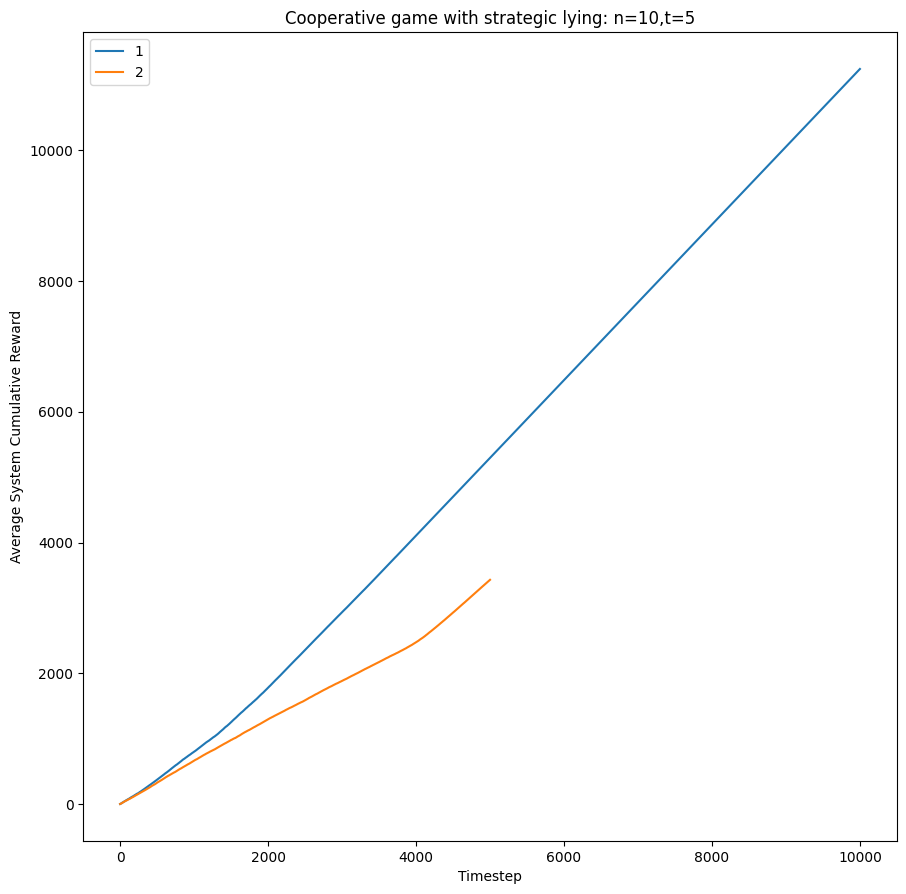

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# set parameters
n = 10
t = 5
steps = 10000

# load simulation results
cum_rew_1 = np.load(f'data/comparison/n{n}t{t}_cum_rew_{steps}steps.npy')
cum_rew_2 = np.load(f'data/control/n{n}t{t}_cum_rew_{steps}steps.npy')

# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
cum_rew_2= np.mean(cum_rew_2, axis=0)

# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')
plt.plot(cum_rew_1, label='1')
plt.plot(cum_rew_2, label='2')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()

NameError: name 'comm_action_1' is not defined

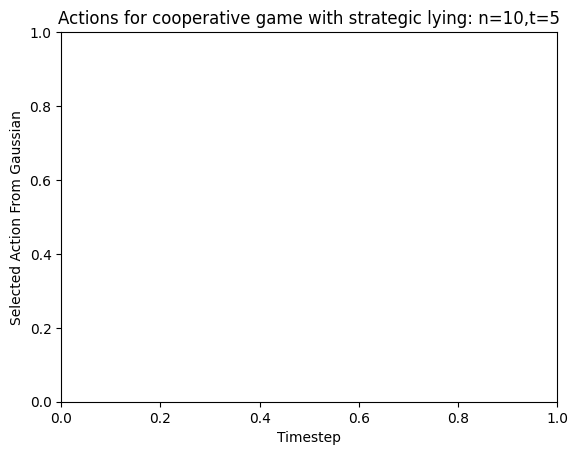

In [10]:
plt.title(f'Actions for cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Selected Action From Gaussian')
plt.plot(comm_action_1, label='1')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)